## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset and Cleaning Data based on needs

In [ ]:
hospitals = pd.read_csv("Hospitals.csv")
hospital_ratings = pd.read_csv("Hospital General Information.csv", encoding="ISO-8859-1")
public_schools = pd.read_csv("Public_Schools.csv")
state_time_series = pd.read_csv("State_time_series.csv")
crosswalk = pd.read_csv("CountyCrossWalk_Zillow.csv")
unemployment = pd.read_csv("GeoFRED_Unemployment_Rate_by_County_Percent.csv")
fips = pd.read_csv("fips_state.csv")

In [ ]:
# Merging State Data with FIPS code

state_time_series= state_time_series.merge(fips, on='RegionName')
state_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,StateFIPS,CountyFIPS,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,21,1614,394388.0,1021
1,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,117,1381,394388.0,1117
2,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,127,1464,394388.0,1127
3,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,7,100,394388.0,1007
4,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,9,883,394388.0,1009


In [ ]:
# Extracting data from 2000

state_time_series.Date = pd.to_datetime(state_time_series.Date)
state_time_series = state_time_series[state_time_series['Date'] >= '01-01-2000']
state_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,StateFIPS,CountyFIPS,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS
3015,2000-01-31,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,21,1614,394388.0,1021
3016,2000-01-31,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,117,1381,394388.0,1117
3017,2000-01-31,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,127,1464,394388.0,1127
3018,2000-01-31,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,7,100,394388.0,1007
3019,2000-01-31,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,9,883,394388.0,1009


### Plotting 10 year average house price and rent for all states

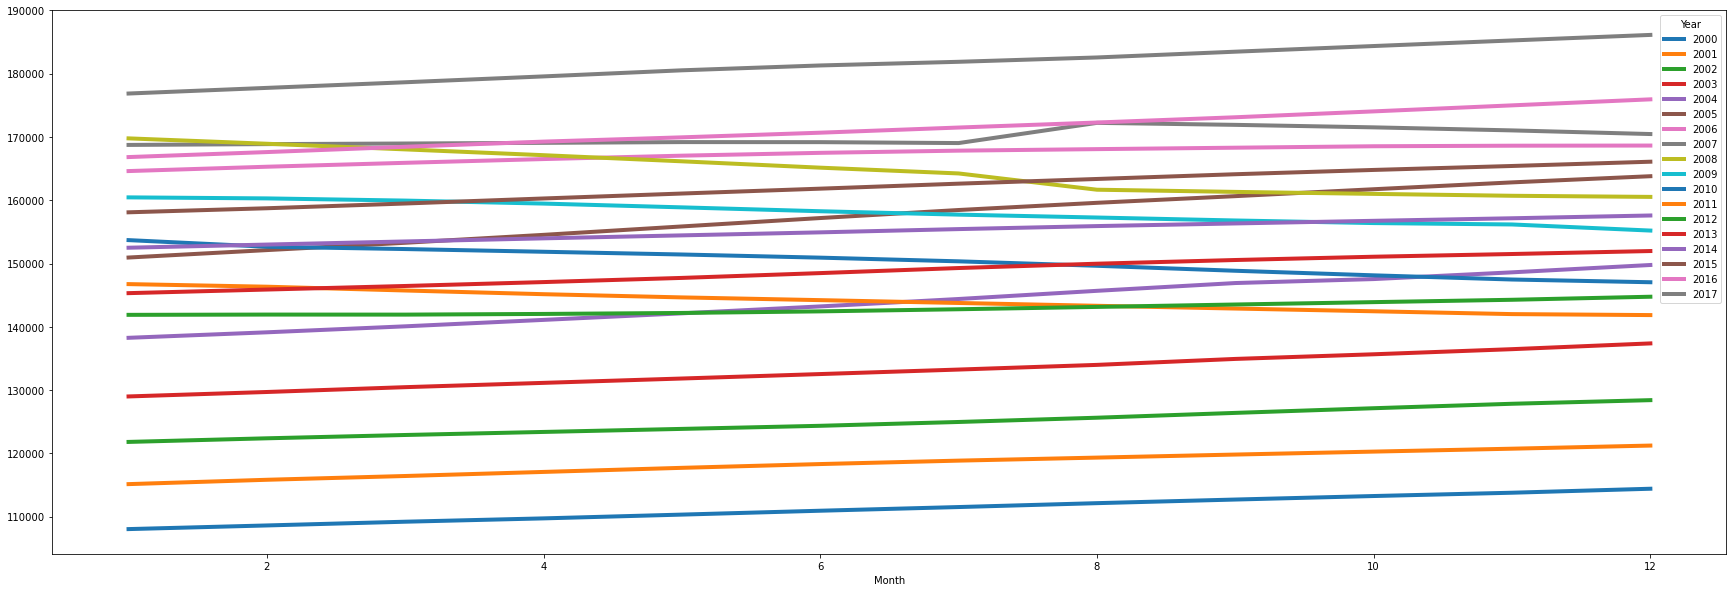

In [ ]:
season = state_time_series
season['Date'] = state_time_series.Date
season['Year'] = state_time_series['Date'].dt.year
season['Month'] = state_time_series['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'ZHVI_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(30,10), linewidth=4)
plt.show()

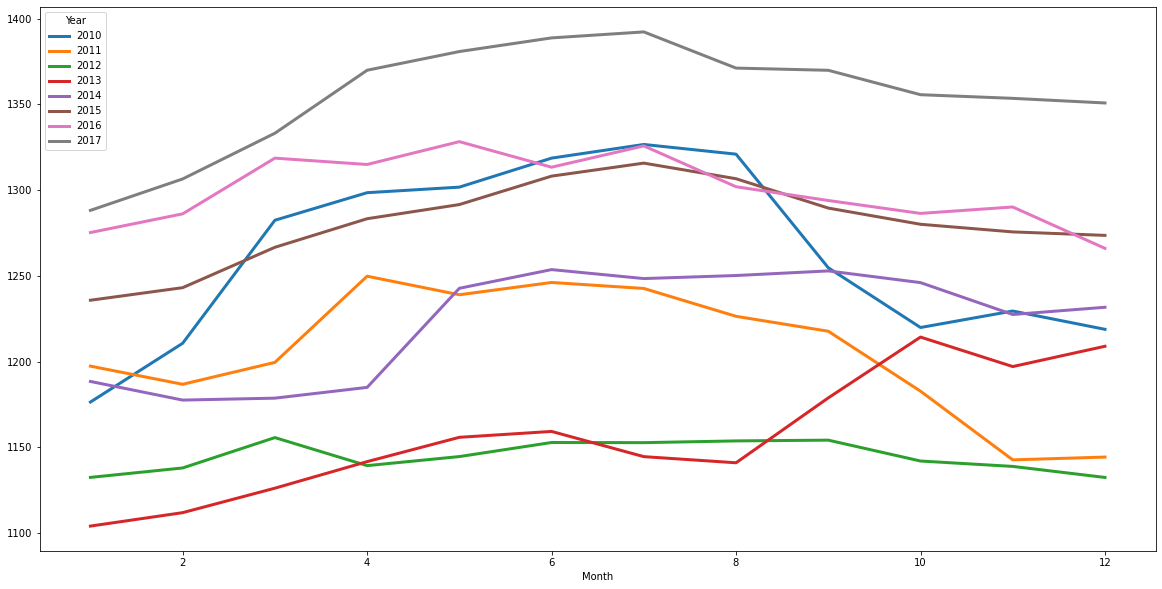

In [ ]:
season = state_time_series
season['Date'] = state_time_series.Date
season['Year'] = state_time_series['Date'].dt.year
season['Month'] = state_time_series['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianRentalPrice_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

In [ ]:
unemployment.shape

(3136, 22)

In [ ]:
unemployment.head()

,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,SCABBE1URN,"Abbeville County, SC",45001,3.8,6.6,7.7,9.1,8.2,7.7,8.8,...,14.2,13.6,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2
1,LAACAD0URN,"Acadia Parish, LA",22001,5.8,6.0,6.3,6.8,5.8,6.1,3.6,...,6.5,7.3,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4
2,VAACCO1URN,"Accomack County, VA",51001,3.0,3.4,4.2,4.4,4.7,4.7,4.3,...,6.5,7.9,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1
3,IDADAC1URN,"Ada County, ID",16001,3.4,3.9,4.7,4.9,4.1,3.3,2.7,...,8.9,8.3,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4
4,OKADAI1URN,"Adair County, OK",40001,3.5,4.1,4.8,7.8,6.2,4.8,4.4,...,8.0,10.5,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4


In [ ]:
# Merging Unemployment Data with FIPS code

unemployment = pd.merge(unemployment, fips, how='left', left_on='Region Code', right_on='FIPS')
unemployment.head()

,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,...,2015,2016,2017,2018,RegionName,StateFIPS,CountyFIPS,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS
0,SCABBE1URN,"Abbeville County, SC",45001,3.8,6.6,7.7,9.1,8.2,7.7,8.8,...,6.9,5.5,4.6,4.2,SouthCarolina,45,1,2606,394655.0,45001
1,LAACAD0URN,"Acadia Parish, LA",22001,5.8,6.0,6.3,6.8,5.8,6.1,3.6,...,6.9,7.4,5.9,5.4,Louisiana,22,1,820,394761.0,22001
2,VAACCO1URN,"Accomack County, VA",51001,3.0,3.4,4.2,4.4,4.7,4.7,4.3,...,5.5,5.0,4.9,4.1,Virginia,51,1,2114,NaN,51001
3,IDADAC1URN,"Ada County, ID",16001,3.4,3.9,4.7,4.9,4.1,3.3,2.7,...,3.7,3.3,2.8,2.4,Idaho,16,1,66,394399.0,16001
4,OKADAI1URN,"Adair County, OK",40001,3.5,4.1,4.8,7.8,6.2,4.8,4.4,...,6.1,5.9,5.0,4.4,Oklahoma,40,1,352,NaN,40001


In [ ]:
# Dropping all columns except year wise unemployment rate, FIPS code and State name

unemployment_per_state = unemployment.drop(["Series ID", "Region Name", "Region Code", "CountyFIPS", "CountyRegionID_Zillow", "MetroRegionID_Zillow", "FIPS"], axis = 1)
unemployment_per_state.rename(index=str, columns={"StateFIPS": "StateFIPS"}, inplace=True)

# Converting FIPS code to int type

unemployment_per_state["StateFIPS"] = unemployment_per_state["StateFIPS"].astype("int64")
unemployment_per_state.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,RegionName,StateFIPS
0,3.8,6.6,7.7,9.1,8.2,7.7,8.8,8.1,8.1,14.2,...,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2,SouthCarolina,45
1,5.8,6.0,6.3,6.8,5.8,6.1,3.6,3.8,4.2,6.5,...,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4,Louisiana,22
2,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,...,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1,Virginia,51
3,3.4,3.9,4.7,4.9,4.1,3.3,2.7,2.7,4.9,8.9,...,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4,Idaho,16
4,3.5,4.1,4.8,7.8,6.2,4.8,4.4,4.7,4.9,8.0,...,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4,Oklahoma,40


In [ ]:
# Grouping data and calculating mean by State name and FIPS code

unemployment_per_state = unemployment_per_state.groupby(['StateFIPS', 'RegionName']).mean()
unemployment_per_state.reset_index(inplace=True)
unemployment_per_state.head()

,StateFIPS,RegionName,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Alabama,5.505970,6.249254,7.028358,7.080597,6.667164,5.185075,4.773134,4.901493,...,13.171642,12.364179,11.216418,9.253731,8.492537,7.897015,7.043284,6.702985,5.037313,4.534328
1,2,Alaska,8.200000,8.541667,9.587500,10.341667,10.120833,9.479167,9.000000,8.391667,...,9.720833,10.700000,10.966667,10.816667,10.837500,10.500000,9.620833,9.065217,9.026087,8.534783
2,4,Arizona,6.046667,6.786667,7.800000,7.606667,7.000000,6.606667,5.986667,5.426667,...,12.933333,13.053333,12.226667,11.213333,10.740000,9.440000,8.713333,7.653333,6.793333,6.646667
3,5,Arkansas,4.840000,5.656000,6.201333,6.740000,6.534667,6.089333,5.892000,6.053333,...,8.662667,9.106667,9.312000,8.532000,8.197333,6.866667,5.798667,4.610667,4.246667,4.242667
4,6,California,6.274138,6.631034,7.610345,7.934483,7.537931,6.825862,6.293103,6.801724,...,12.427586,13.831034,13.451724,12.165517,10.427586,8.832759,7.537931,6.936207,6.039655,5.194828


In [ ]:
# Calculating unemployment rate average of 10 years state wise

unemployment_per_state['AvgUnemployment'] = unemployment_per_state.iloc[:,2:].mean(axis=1)
avg_unemployment_per_state = unemployment_per_state[["StateFIPS", "RegionName","AvgUnemployment"]]
avg_unemployment_per_state.head()

,StateFIPS,RegionName,AvgUnemployment
0,1,Alabama,7.372820
1,2,Alaska,9.590847
2,4,Arizona,8.461754
3,5,Arkansas,6.515930
4,6,California,8.495100


<AxesSubplot:xlabel='RegionName'>

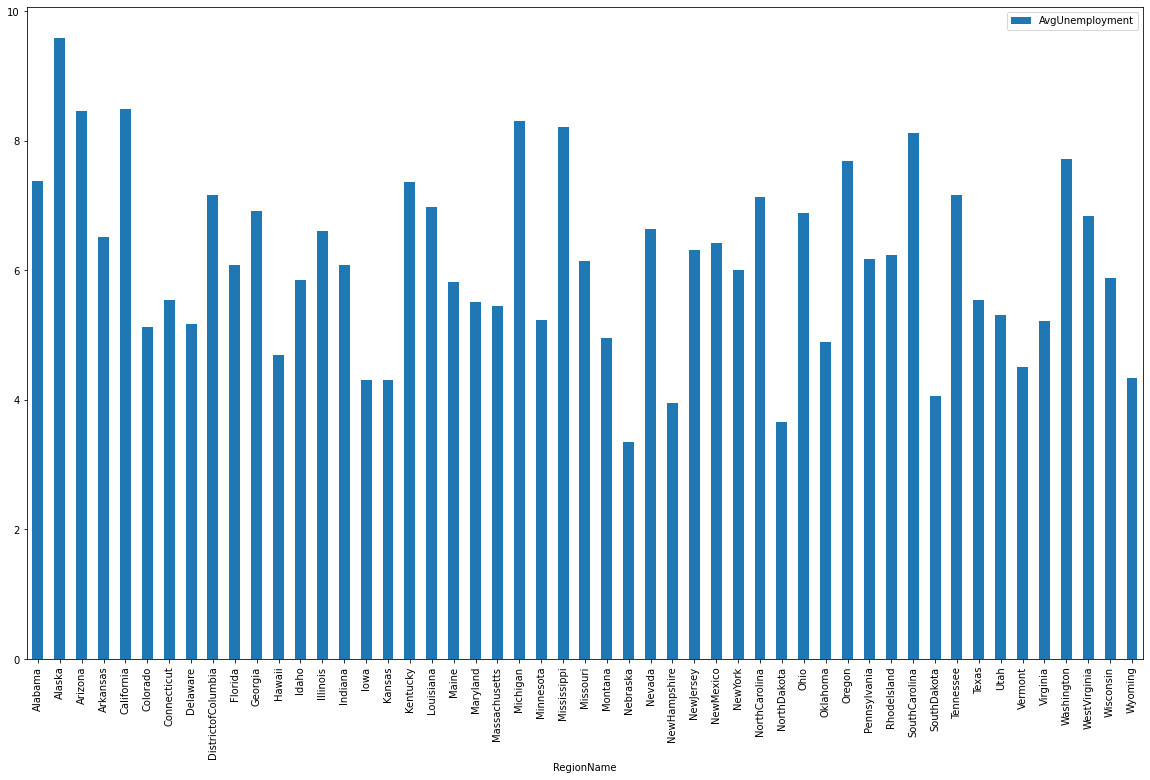

In [ ]:
# Plotting average unemplyoemnt rate data state wise

avg_unemployment_per_state.plot.bar(x='RegionName', y='AvgUnemployment', figsize=(20,12))

In [ ]:
hospitals.shape

(7570, 34)

In [ ]:
hospitals.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [ ]:
hospital_ratings.shape

(4812, 28)

In [ ]:
hospital_ratings.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [ ]:
# Dropping all columns except Hospital Name and Rating

hospital_ratings = hospital_ratings[['Hospital Name', 'Hospital overall rating']]

# Droping null values
hospital_ratings.dropna()

hospital_ratings.head()

,Hospital Name,Hospital overall rating
0,SOUTHEAST ALABAMA MEDICAL CENTER,3
1,MARSHALL MEDICAL CENTER SOUTH,3
2,ELIZA COFFEE MEMORIAL HOSPITAL,2
3,MIZELL MEMORIAL HOSPITAL,2
4,CRENSHAW COMMUNITY HOSPITAL,3


In [ ]:
# Mergin Hospital Name and rating with Hospital data (state name)

hospitals_with_ratings = pd.merge(hospitals, hospital_ratings, how='left', left_on='NAME', right_on='Hospital Name')

# Mergin Hospital data with FIPS Code
hospitals_with_ratings = pd.merge(hospitals_with_ratings, fips, how='left', left_on='ST_FIPS', right_on='StateFIPS')

hospitals_with_ratings = hospitals_with_ratings.dropna()

hospitals_with_ratings = hospitals_with_ratings[['Hospital Name', 'Hospital overall rating', 'StateFIPS', 'RegionName']]


hospitals_with_ratings = hospitals_with_ratings.loc[hospitals_with_ratings['Hospital overall rating'] != 'Not Available']

hospitals_with_ratings["StateFIPS"] = hospitals_with_ratings["StateFIPS"].astype("int64")
hospitals_with_ratings["Hospital overall rating"] = hospitals_with_ratings["Hospital overall rating"].astype("int64")

# Droping Duplicate Rows
hospitals_with_ratings = hospitals_with_ratings.drop_duplicates(["Hospital Name"])

# Getting Total Number of hospital per state
total_hospital_state  = hospitals_with_ratings.groupby(['StateFIPS', 'RegionName']).size()
hospitals_with_ratings.head()

,Hospital Name,Hospital overall rating,StateFIPS,RegionName
760,TRINITY HOSPITALS,1,38,NorthDakota
8282,SENTARA RMH MEDICAL CENTER,3,51,Virginia
8417,JOHNSTON MEMORIAL HOSPITAL,3,51,Virginia
8726,WISE REGIONAL HEALTH SYSTEM,3,48,Texas
9073,CHI HEALTH ST MARY'S,3,31,Nebraska


In [ ]:
hospitals_with_ratings = hospitals_with_ratings.drop(['Hospital Name'], axis = 1)

In [ ]:
total_hospital_state = total_hospital_state.to_frame()
total_hospital_state = total_hospital_state.rename(columns = {0:'Total Hospital'})
total_hospital_state.head()

,,Total Hospital
StateFIPS,RegionName,
1,Alabama,63
2,Alaska,7
4,Arizona,36
5,Arkansas,34
6,California,167


In [ ]:
# Getting mean hospital rating state wise

hospitals_with_ratings = hospitals_with_ratings.groupby(['StateFIPS', 'RegionName']).mean()

# Merging hospital rating per state with total number of hospital per state

hospitals_with_ratings = pd.merge(hospitals_with_ratings, total_hospital_state, on = ["RegionName", "StateFIPS"])
hospitals_with_ratings.reset_index(inplace=True)
hospitals_with_ratings["StateFIPS"] = hospitals_with_ratings["StateFIPS"].astype("int64")
hospitals_with_ratings.head()

,RegionName,StateFIPS,Hospital overall rating,Total Hospital
0,Alabama,1,3.079365,63
1,Alaska,2,3.000000,7
2,Arizona,4,2.805556,36
3,Arkansas,5,2.852941,34
4,California,6,2.778443,167


<AxesSubplot:xlabel='RegionName'>

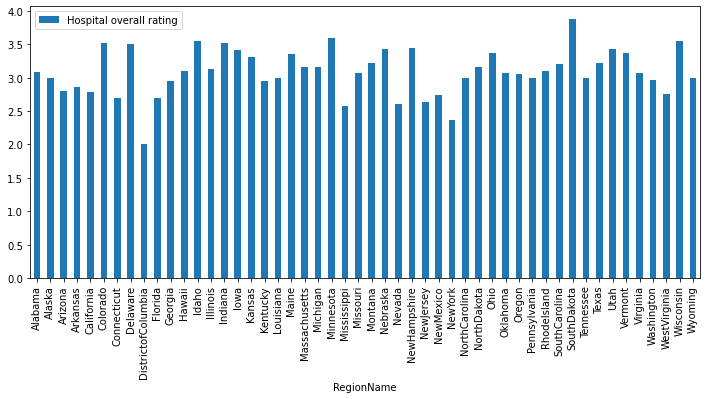

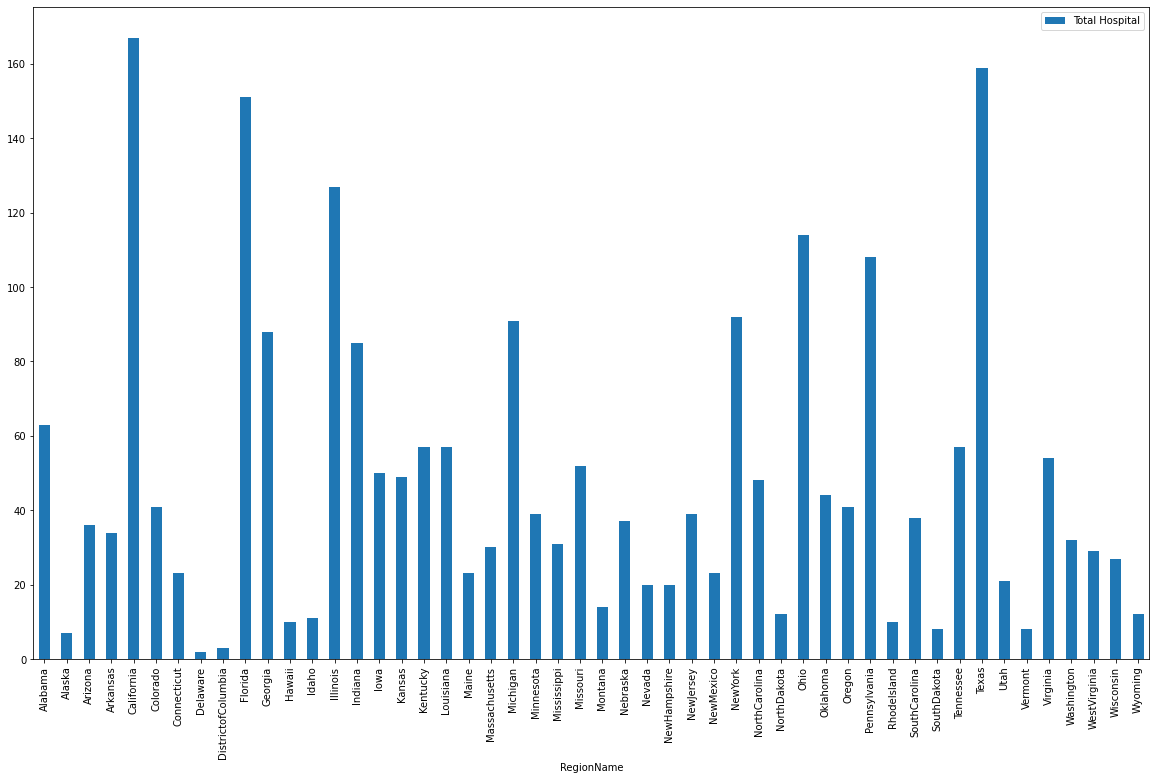

In [ ]:
ax= hospitals_with_ratings.plot.bar(x= "RegionName",y="Hospital overall rating", figsize= (12,5))
hospitals_with_ratings.plot.bar(x= "RegionName",y= "Total Hospital",figsize= (20,12))

In [ ]:
public_schools.shape

(102370, 33)

In [ ]:
public_schools.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-143.966577,62.704861,2189,2.000700e+10,SLANA SCHOOL,MILE 4 NABESNA RD,SLANA,AK,99586,NOT AVAILABLE,...,GEOCODE,2017-10-31T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,4,19,PK,12,200070,1,NOT AVAILABLE
1,-159.767983,62.200405,2588,2.005200e+10,HOLY CROSS SCHOOL,90 CHINANA AVENUE,HOLY CROSS,AK,99602,NOT AVAILABLE,...,IMAGERY/OTHER,2017-10-31T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,4,41,KG,12,200520,4,NOT AVAILABLE
2,-163.035514,64.545297,2633,2.000200e+10,MARTIN L. OLSON SCHOOL,40 MAIN STREET,GOLOVIN,AK,99762,NOT AVAILABLE,...,GEOCODE,2010-09-14T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,4,60,PK,12,200020,6,NOT AVAILABLE
3,-149.463546,61.400559,2634,2.001800e+10,CHUGIAK ELEMENTARY,19932 OLD GLENN HIGHWAY,CHUGIAK,AK,99567,30,...,IMAGERY,2010-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,426,PK,6,200180,26,10775055
4,-147.347929,64.763910,2912,2.006000e+10,STAR OF THE NORTH SECONDARY SCHOOL,2945 MONK COURT,NORTH POLE,AK,99705,NOT AVAILABLE,...,IMAGERY,2010-09-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,193,7,12,200600,12,NOT AVAILABLE


In [ ]:
public_schools_per_state = pd.merge(public_schools, fips, how='left', left_on='COUNTYFIPS', right_on='FIPS')
public_schools_per_state = public_schools_per_state[["StateFIPS", "RegionName", "NAME"]]

public_schools_per_state.head()

,StateFIPS,RegionName,NAME
0,2.0,Alaska,SLANA SCHOOL
1,2.0,Alaska,HOLY CROSS SCHOOL
2,2.0,Alaska,MARTIN L. OLSON SCHOOL
3,2.0,Alaska,CHUGIAK ELEMENTARY
4,2.0,Alaska,STAR OF THE NORTH SECONDARY SCHOOL


In [ ]:
# Number of Public schools per county

total_school  = public_schools_per_state.groupby(['StateFIPS', 'RegionName']).size()
total_school = total_school.to_frame()
total_school = total_school.rename(columns = {0:'Total Schools'})
total_school.head()

,,Total Schools
StateFIPS,RegionName,
1.0,Alabama,1659
2.0,Alaska,498
4.0,Arizona,2468
5.0,Arkansas,1123
6.0,California,10415


In [ ]:
public_schools_per_state = pd.merge(public_schools_per_state, total_school, on = "RegionName")

public_schools_per_state= public_schools_per_state.drop(["NAME"], axis = 1)
public_schools_per_state["StateFIPS"] = public_schools_per_state["StateFIPS"].astype("int64")
public_schools_per_state = public_schools_per_state.drop_duplicates(["StateFIPS"])
hospitals_with_ratings.reset_index(inplace=True)

public_schools_per_state.head()

,StateFIPS,RegionName,Total Schools
0,2,Alaska,498
498,1,Alabama,1659
2157,5,Arkansas,1123
3280,4,Arizona,2468
5748,6,California,10415


<AxesSubplot:xlabel='RegionName'>

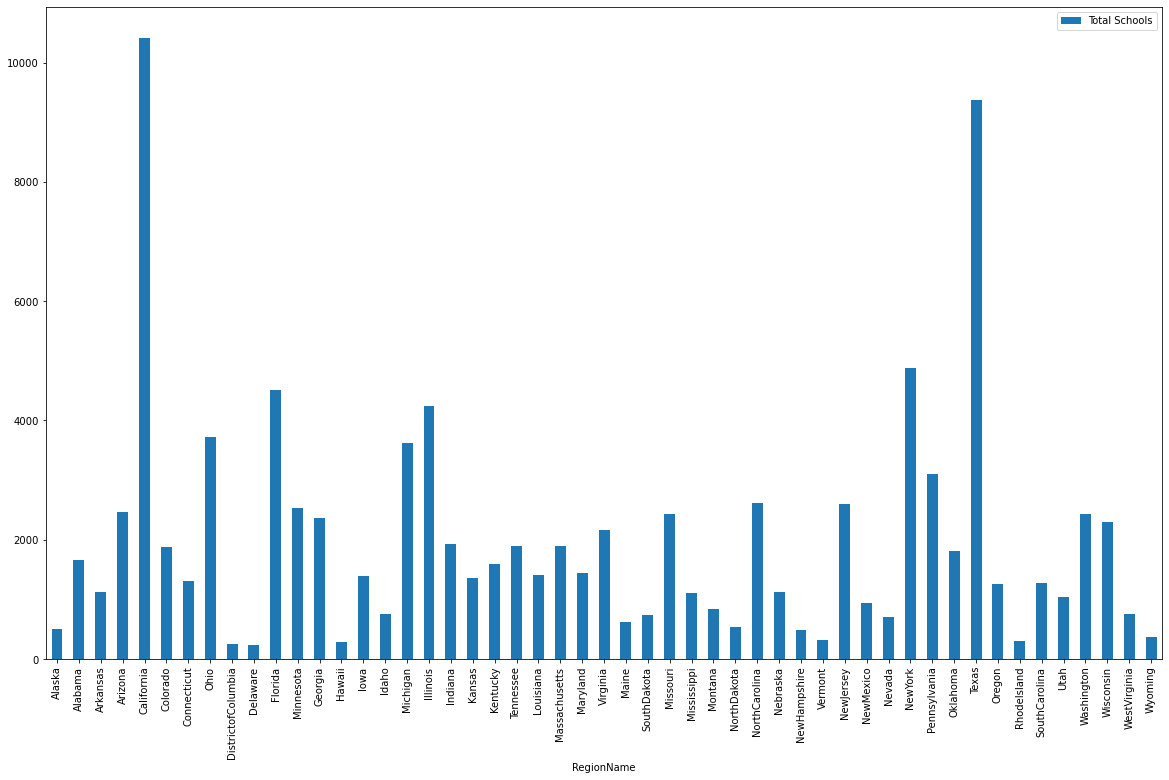

In [ ]:
# Plotting number of schools state wise

public_schools_per_state.plot.bar(x= "RegionName",y= "Total Schools",figsize= (20,12))

In [ ]:
# Average price for houses state wise

house_prices = state_time_series.groupby("RegionName").mean()
house_prices.head()

,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,StateFIPS,CountyFIPS,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,Year,Month
RegionName,,,,,,,,,,,,,,,,,,,,,
Alabama,127.898684,31177.770833,31178.229167,178.260536,96.859272,89.607500,99.299400,100.302842,89.818676,191.162351,...,0.627930,979.848837,964.255814,1.0,67.000000,1603.477612,403904.051282,1067.000000,2008.5,6.5
Alaska,99.507895,3608.270833,3608.437500,173.888997,163.384725,158.657713,155.134081,126.855100,156.473570,161.026286,...,1.289341,1604.548780,NaN,2.0,153.620690,50637.344828,394541.400000,2153.620690,2008.5,6.5
Arizona,87.218421,39681.343750,39677.802083,131.784286,121.322285,121.950664,119.687801,114.140112,130.929554,130.248900,...,0.758512,1018.325581,1210.337209,4.0,13.866667,1376.533333,394987.666667,4013.866667,2008.5,6.5
Arkansas,118.000000,18591.593750,18594.250000,112.612364,75.138984,85.377384,99.095516,98.202286,87.407146,113.039165,...,0.605209,800.593023,900.383721,5.0,75.000000,1587.880000,404456.432432,5075.000000,2008.5,6.5
California,78.676316,94404.104167,94445.520833,382.292817,283.693771,249.322800,246.949145,260.924883,267.604879,326.802601,...,1.381349,2015.337209,2144.209302,6.0,58.000000,1792.948276,426859.866667,6058.000000,2008.5,6.5


# Creating Final Dataset

- Extracting only Average House Price, FIPS code, Average House price per sqr-feet and Average Rent state wise
- Merging all cleaned data

In [ ]:
team_est = house_prices[["ZHVI_AllHomes", "StateFIPS", "ZriPerSqft_AllHomes", 'MedianRentalPrice_AllHomes']]
team_est.head()
team_est.reset_index(level=0, inplace=True)
team_est.rename(index=str, columns={"RegionName": "State", "ZHVI_AllHomes": "AverageHousePrice", "MedianRentalPrice_AllHomes" : "AverageRent", "ZriPerSqft_AllHomes":"Avfsqft"}, inplace=True)
team_est["StateFIPS"] = team_est["StateFIPS"].astype("int64")
team_est = team_est.dropna()
team_est.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-31-96e37dc6fd8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_est["StateFIPS"] = team_est["StateFIPS"].astype("int64")


,State,AverageHousePrice,StateFIPS,Avfsqft,AverageRent
0,Alabama,115063.425926,1,0.627930,945.038043
1,Alaska,235543.055556,2,1.289341,1589.487952
2,Arizona,180743.981481,4,0.758512,1193.345745
3,Arkansas,98659.259259,5,0.605209,947.331579
4,California,384376.851852,6,1.381349,2147.404255


In [ ]:
# Mergin dataset

team_est = team_est.merge(avg_unemployment_per_state, on="StateFIPS")
team_est = team_est.merge(public_schools_per_state, on="StateFIPS")
team_est = team_est.merge(hospitals_with_ratings, on="StateFIPS")
team_est = team_est[['State', 'Total Schools', 'Total Hospital', 'Hospital overall rating', 'AvgUnemployment',  "Avfsqft", "AverageRent", 'AverageHousePrice']]
team_est.head()

,State,Total Schools,Total Hospital,Hospital overall rating,AvgUnemployment,Avfsqft,AverageRent,AverageHousePrice
0,Alabama,1659,63,3.079365,7.372820,0.627930,945.038043,115063.425926
1,Alaska,498,7,3.000000,9.590847,1.289341,1589.487952,235543.055556
2,Arizona,2468,36,2.805556,8.461754,0.758512,1193.345745,180743.981481
3,Arkansas,1123,34,2.852941,6.515930,0.605209,947.331579,98659.259259
4,California,10415,167,2.778443,8.495100,1.381349,2147.404255,384376.851852


<AxesSubplot:>

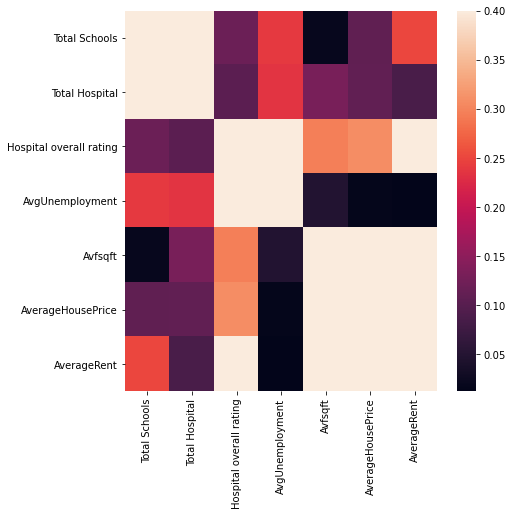

In [ ]:
# Plotting coorelation between features

corrmat = team_est.corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat.abs(), vmax=.4, square=False)

In [ ]:
print ("The correlation between a house price and the number of hospitals is: {0}".format(corrmat["AverageHousePrice"]["Total Hospital"]))
print ("The correlation between a house price and the average hospital rating is: {0}".format(corrmat["AverageHousePrice"]["Hospital overall rating"]))
print ("The correlation between a house price and the number of schools is: {0}".format(corrmat["AverageHousePrice"]["Total Schools"]))
print ("The correlation between a house price and the unemployment rate is: {0}".format(corrmat["AverageHousePrice"]["AvgUnemployment"]))
print ("The correlation between a house price and the average rent is: {0}".format(corrmat["AverageHousePrice"]["AverageRent"]))
print ("The correlation between a house price and the average price per sqr_feet is: {0}".format(corrmat["AverageHousePrice"]["Avfsqft"]))

The correlation between a house price and the number of hospitals is: -0.10979622877935635
The correlation between a house price and the average hospital rating is: -0.30849722716408334
The correlation between a house price and the number of schools is: 0.10923147385165584
The correlation between a house price and the unemployment rate is: 0.01700132949276519
The correlation between a house price and the average rent is: 0.8402757243440176
The correlation between a house price and the average price per sqr_feet is: 0.8762089824059839


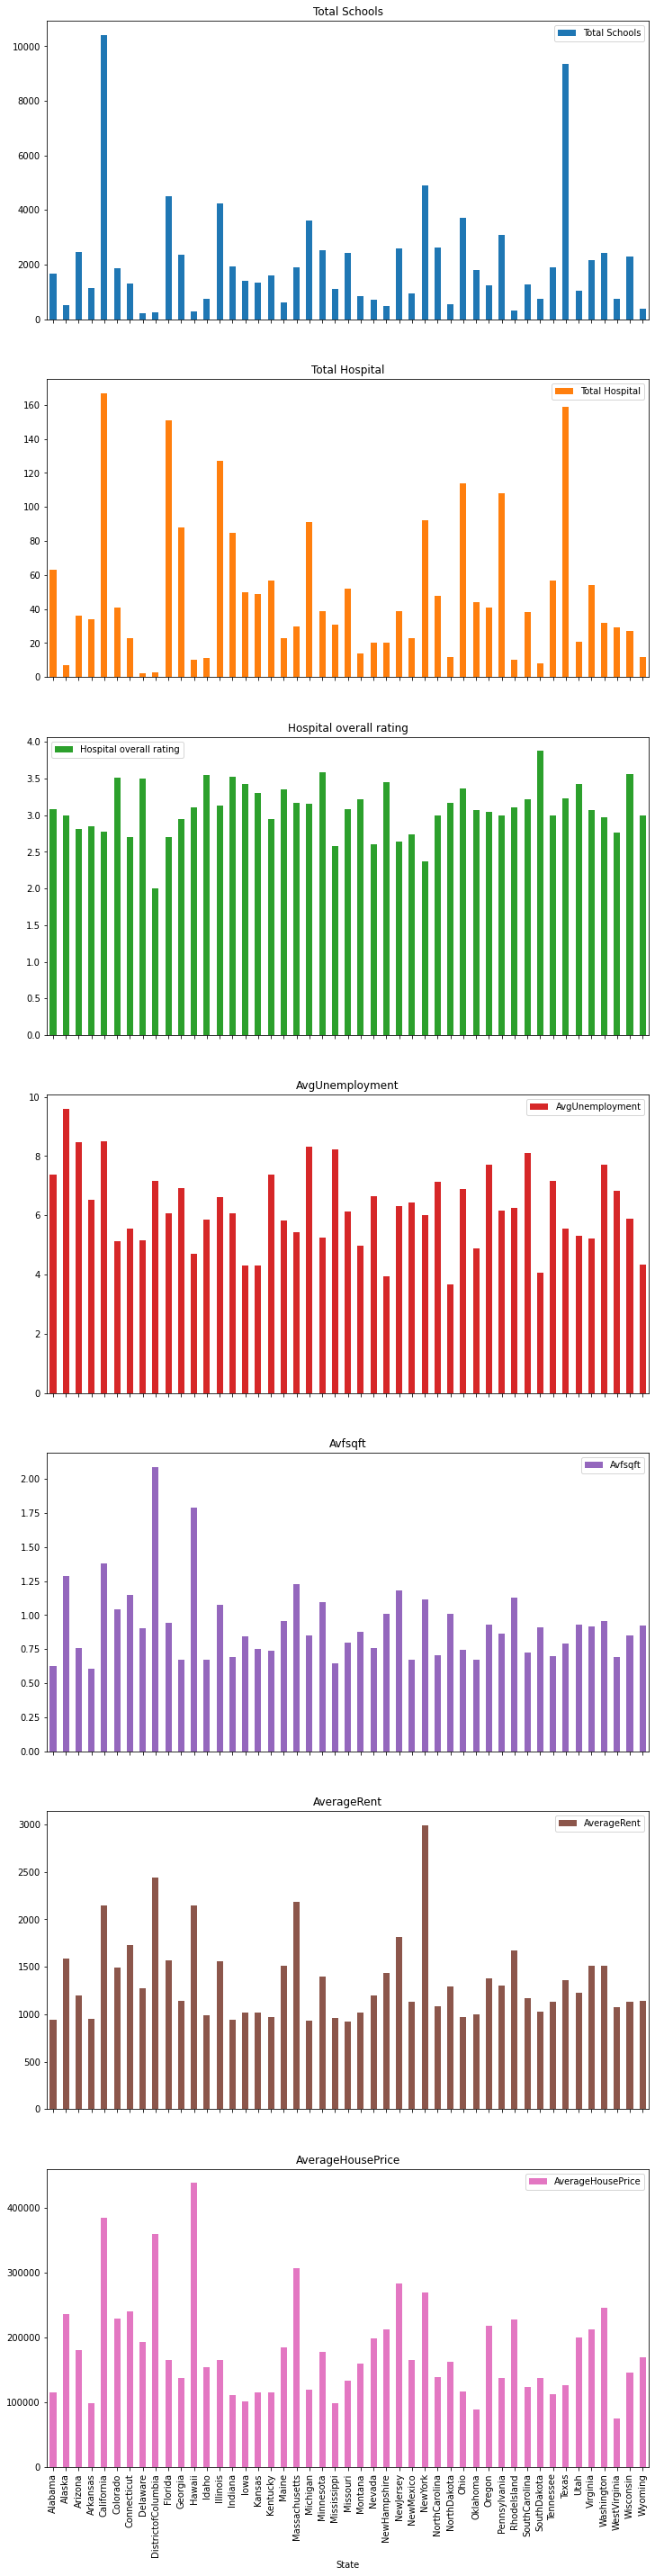

In [ ]:
ax = team_est.plot.bar(x= "State", rot=90, subplots=True, figsize = (12,50))

In [24]:
# Saving final dataset to CSV

team_est.to_csv("team_est.csv", index = True)

## Data Preprocessing 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

dataset = team_est.values

# Getting dataset without FIPS code
dataset = dataset[:, 1:]

# Getting feature and label set
x, y = dataset[:,:-1], dataset[:, -1]

# Splitting train and set dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=777)

In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
scaler = MinMaxScaler()

In [30]:
X_train= scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model Building - Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [32]:
lm = LinearRegression()
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)
r2_score(y_test, y_pred_lm)

0.8167264862655306

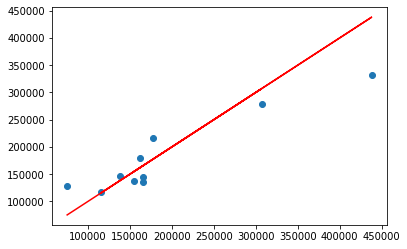

In [34]:
# Our predictions
plt.scatter(y_test,y_pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Model Building - Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [36]:
np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score(y_test, y_pred_rf)

0.7111235098912159

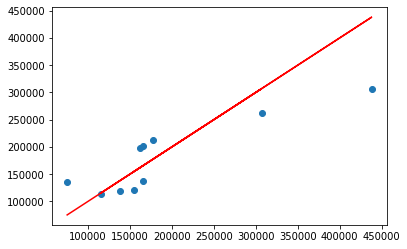

In [37]:
# Our predictions
plt.scatter(y_test,y_pred_rf)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Model Building - XGBoost 

In [38]:
from xgboost import XGBRegressor

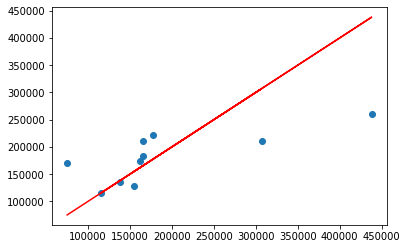

In [39]:
xgboost = XGBRegressor(objective ='reg:squarederror', 
                       colsample_bytree = 0.3, 
                       learning_rate = 0.1,
                       max_depth = 5, 
                       alpha = 10, 
                       random_state=777,
                       n_estimators = 100)
xgboost.fit(X_train, y_train)

y_prediction = xgboost.predict(X_test)

r2_score(y_test, y_prediction)
# Our predictions
plt.scatter(y_test,y_prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')

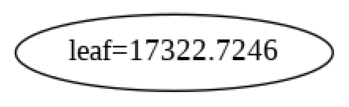

In [40]:
from xgboost import plot_tree
from xgboost import to_graphviz
import matplotlib.pyplot as plt

plot_tree(xgboost)
plt.show()

for i in range(100):
    dot = to_graphviz(xgboost, num_trees=i)
    dot.render("trees{0}".format(i))

In [41]:
print("These are the importance of each feature: {0}".format(xgboost.feature_importances_))

These are the importance of each feature: [0.11260203 0.07716261 0.15019886 0.05576948 0.33883464 0.2654324 ]


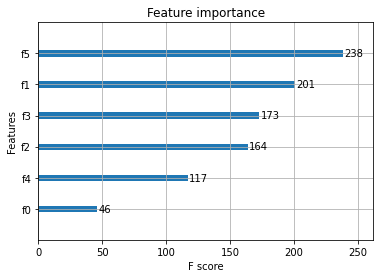

In [42]:
# Plotting Featrue importance

from xgboost import plot_importance
plot_importance(xgboost)
plt.show()